In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
print(tf.__version__)

1.12.0


In [3]:
QBtrain = pd.read_csv('TrainingBig/QBtrain.csv')
QBtrain.columns

Index(['Unnamed: 0', 'Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'Third

In [4]:
QBtrain = QBtrain.drop('Unnamed: 0', axis=1)

In [5]:
QBtrain.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,...,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000
mean,19.519180,30.623569,59.806875,223.171202,6.910742,1.382916,0.712273,85.351485,2.776646,11.460721,...,55.529415,6.195163,14.918391,90.676603,63.148088,238.741789,6.788976,10.744601,1.579944,88.272216
std,7.436125,11.021653,16.572919,87.131458,2.224274,0.794581,0.525656,26.380535,1.956674,12.199150,...,8.723874,1.304548,2.269805,116.264134,3.411499,24.172308,0.600030,0.750424,0.368699,9.208161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,...,34.800000,3.000000,10.500000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,17.666667,29.000000,59.400000,194.625000,6.500000,1.000000,0.333333,78.747500,1.416667,2.000000,...,50.000000,5.400000,13.300000,34.062500,60.600000,224.875000,6.400000,10.200000,1.312500,82.000000
50%,21.400000,33.333333,63.611111,244.250000,7.277500,1.400000,0.666667,90.488333,2.333333,7.500000,...,55.300000,6.200000,14.400000,35.625000,63.200000,237.500000,6.800000,10.700000,1.555556,88.000000
75%,24.111111,37.178030,67.121875,274.875000,7.925000,2.000000,1.000000,99.823750,3.750000,17.321429,...,60.000000,7.100000,16.400000,39.562500,64.900000,251.250000,7.200000,11.200000,1.875000,94.000000
max,39.000000,53.000000,100.000000,439.000000,22.000000,5.000000,4.000000,158.330000,14.000000,104.000000,...,87.500000,10.100000,22.300000,419.000000,73.600000,313.333333,8.900000,13.600000,2.812500,121.000000


In [6]:
QBtrain.head()

,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,Joe Flacco,25.666667,41.166667,61.633333,267.500000,6.300000,1.333333,1.166667,77.760000,1.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
1,Jay Cutler,18.000000,36.000000,50.000000,225.000000,6.200000,1.000000,1.000000,67.480000,4.000000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
2,Andy Dalton,21.777778,32.888889,66.600000,269.222222,8.488889,2.000000,0.555556,107.934444,4.777778,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
3,Josh McCown,24.500000,36.666667,66.783333,281.000000,7.450000,1.333333,0.500000,93.173333,2.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
4,Matthew Stafford,26.500000,40.750000,65.300000,254.250000,6.425000,1.250000,1.250000,80.237500,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79


In [7]:
QBtrain.columns

Index(['Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts',

In [8]:
df = QBtrain.drop(['Name', 'Home'], axis=1).astype('float64')

In [9]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(df)
y_noano = clf.predict(df)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = df.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 178
Number of rows without outliers: 1600


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [10]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [11]:
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CompletionsGame,1422.0,19.477374,7.536047,0.000000,17.600000,21.500000,24.104167,39.000000
AttemptsGame,1422.0,30.480568,11.143726,0.000000,29.000000,33.333333,37.000000,53.000000
PassingCompletionPercentage,1422.0,59.831029,17.003742,0.000000,59.588125,63.715260,67.300000,100.000000
YardsGame,1422.0,222.632294,88.340472,0.000000,193.586538,244.366667,275.500000,439.000000
PassingYardsPerAttempt,1422.0,6.914345,2.298988,0.000000,6.500000,7.286607,7.950000,22.000000
PassingTouchdownsGame,1422.0,1.391597,0.812538,0.000000,1.000000,1.400000,2.000000,5.000000
InterceptionsGame,1422.0,0.706084,0.526316,0.000000,0.333333,0.666667,1.000000,4.000000
PassingRating,1422.0,85.613335,26.969343,0.000000,78.560625,90.712821,100.046517,158.330000
RushingAttemptsGame,1422.0,2.747558,1.954170,0.000000,1.400000,2.333333,3.741071,14.000000
RushingYardsGame,1422.0,11.206432,12.198607,-7.000000,2.000000,7.160256,16.600000,104.000000


In [12]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
df_labels = df.pop('Score')

In [13]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_df = norm(df)

In [14]:
def build_model():
  model = keras.Sequential([
    layers.Dense(40, activation=tf.nn.leaky_relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [15]:
model = build_model()

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                2600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
_________________________________________________________________


In [17]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.12395275],
       [-1.7070805 ],
       [ 1.5722632 ],
       [-0.51844275],
       [-0.93174756],
       [-1.0973687 ],
       [-0.48803496],
       [-1.6323228 ],
       [ 0.28365135],
       [ 1.7436881 ]], dtype=float32)

In [18]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
495,88.190226,7.548146,88.190226,16.392778,3.092586,16.392778,495
496,86.492535,7.541279,86.492535,16.326868,3.100690,16.326868,496
497,88.334272,7.539445,88.334272,16.373866,3.104674,16.373866,497
498,88.896910,7.545810,88.896910,16.199590,3.095234,16.199590,498
499,87.922268,7.560751,87.922268,16.120355,3.083438,16.120355,499


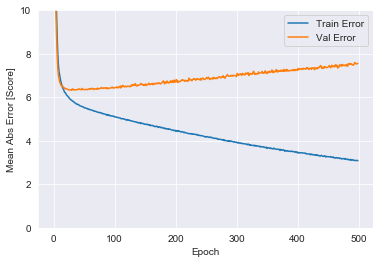

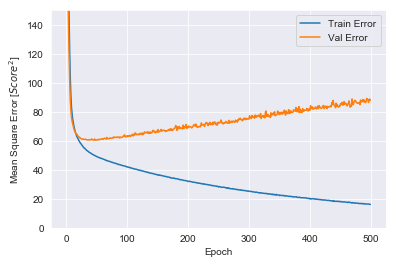

In [20]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Score]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,10])
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Score^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,150])

plot_history(history)

In [21]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Score".format(mae))

Testing set Mean Abs Error:  6.59 Score



..................................................

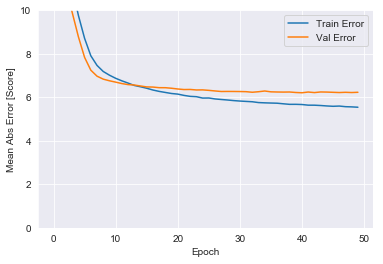

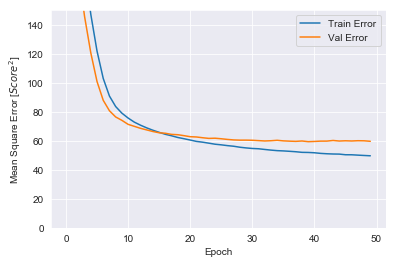

In [22]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [23]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Score".format(mae))

Testing set Mean Abs Error:  5.97 Score


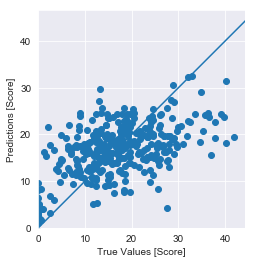

In [24]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Score]')
plt.ylabel('Predictions [Score]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

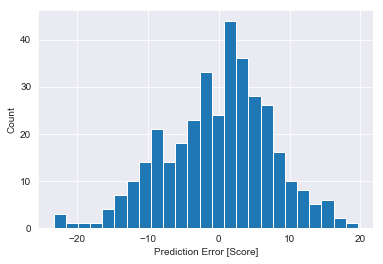

In [25]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Score]")
_ = plt.ylabel("Count")

In [26]:
def build_model():
  model = keras.Sequential([
    layers.Dense(40, activation=tf.nn.leaky_relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


...................

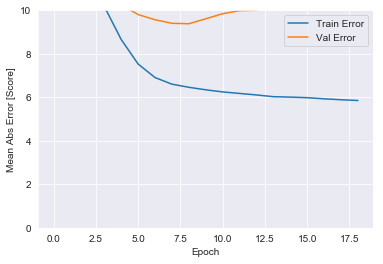

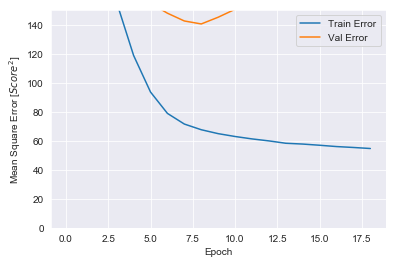

In [27]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_df, df_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [28]:
Offense = pd.read_csv('Input/Offense/Offense.csv')
Offense = Offense.set_index('Team')
Offense.head()


,PointsPerGame,Score,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,...,OpponentTacklesForLossPercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
SF,23.0,230,633,3565,5.6,216,121,39.7,32,46.9,...,27.6,8.9,19.4,319,62.1,2229,7.0,11.3,17,85
CHI,29.4,294,632,3579,5.7,216,124,43.5,34,64.7,...,19.2,5.6,11.2,321,65.4,2350,7.3,11.2,20,96
CIN,25.6,256,578,3293,5.7,198,110,39.1,29,79.3,...,26.9,5.6,10.3,356,62.4,2393,6.7,10.8,20,89
BUF,13.7,137,634,2686,4.2,160,143,30.8,19,57.9,...,26.1,9.7,18.5,317,55.8,1598,5.0,9.0,5,54
DEN,22.8,228,628,3719,5.9,205,126,34.9,30,53.3,...,17.9,6.2,16.8,364,63.5,2471,6.8,10.7,12,83


In [29]:
Offense['Played'] = Offense['Score'] / Offense['PointsPerGame']

In [30]:
Offense['OffensivePlays'] = Offense['OffensivePlays'] / Offense['Played']
Offense['OffensiveYards'] = Offense['OffensiveYards'] / Offense['Played']
Offense['FirstDowns'] = Offense['FirstDowns'] / Offense['Played']
Offense['ThirdDownAttempts'] = Offense['ThirdDownAttempts'] / Offense['Played']
Offense['RedZoneAttempts'] = Offense['RedZoneAttempts'] / Offense['Played']
Offense['PassingAttempts'] = Offense['PassingAttempts'] / Offense['Played']
Offense['PassingYards'] = Offense['PassingYards'] / Offense['Played']
Offense['PassingTouchdowns'] = Offense['PassingTouchdowns'] / Offense['Played']

In [31]:
QBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'TimesSackedPercentage', 'OpponentQuarterbackHitsPercentage']]

In [32]:
RBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'OpponentTacklesForLossPercentage']]

In [33]:
WROffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'PassingAttempts', 'CompletionPercentage', 'PassingYards', 'TeamPassingYardsPerAttempt', \
                    'PassingYardsPerCompletion', 'PassingTouchdowns', 'PasserRating']]

In [34]:
Def = pd.read_csv('Input/Defense/Def.csv')
Def['Opponent'] = Def['Team']
Def = Def.drop('Team', axis=1)
Def = Def.set_index('Opponent')
Def.head()

,OpponentPointsPerGame,OpponentScore,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,TacklesForLossPercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
Opponent,,,,,,,,,,,,,,,,,,,,,
SF,26.6,266,633,3442,5.4,203,133,37.6,40,57.5,...,23.4,6.6,15.2,356,60.4,2420,6.8,11.3,21,98
CHI,19.5,195,639,3144,4.9,183,137,35.0,24,62.5,...,28.6,7.7,14.9,383,62.9,2366,6.2,9.8,19,77
CIN,31.2,312,719,4494,6.3,261,146,55.5,39,66.7,...,12.9,5.6,14.6,387,66.9,2958,7.6,11.4,21,96
BUF,25.1,251,611,3022,4.9,187,131,38.2,31,67.7,...,29.0,7.0,16.2,334,64.4,2024,6.1,9.4,14,85
DEN,23.5,235,643,3755,5.8,195,135,40.0,32,59.4,...,21.7,8.4,17.0,340,63.2,2476,7.3,11.5,18,91


In [35]:
Def['Played'] = Def['OpponentScore'] / Def['OpponentPointsPerGame']

In [36]:
Def['OpponentOffensivePlays'] = Def['OpponentOffensivePlays'] / Def['Played']
Def['OpponentOffensiveYards'] = Def['OpponentOffensiveYards'] / Def['Played']
Def['OpponentFirstDowns'] = Def['OpponentFirstDowns'] / Def['Played']
Def['OpponentThirdDownAttempts'] = Def['OpponentThirdDownAttempts'] / Def['Played']
Def['OpponentRedZoneAttempts'] = Def['OpponentRedZoneAttempts'] / Def['Played']
Def['OpponentRushingYards'] = Def['OpponentRushingYards'] / Def['Played']
Def['OpponentPassingYards'] = Def['OpponentPassingYards'] / Def['Played']
Def['OpponentPassingTouchdowns'] = Def['OpponentPassingTouchdowns'] / Def['Played']
Def['OpponentRushingTouchdowns'] = Def['OpponentRushingTouchdowns'] / Def['Played']

In [37]:
QBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentTimesSackedPercentage', 'QuarterbackHitsPercentage', 'OpponentPassingAttempts', \
            'OpponentCompletionPercentage', 'OpponentPassingYards', 'OpponentPassingYardsPerAttempt', \
            'OpponentPassingYardsPerCompletion', 'OpponentPassingTouchdowns', 'OpponentPasserRating']]

In [38]:
RBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentRushingYards', 'OpponentRushingYardsPerAttempt', 'TacklesForLossPercentage', 'OpponentRushingTouchdowns']]

In [39]:
QB = pd.read_csv('Input/Aggregate/QBAggregate.csv')
QBavg = pd.DataFrame()

QBavg['Name'] = QB['Name']
QBavg['Team'] = QB['Team']
QBavg['Rank'] = QB['Rank']
QBavg['CompletionsGame'] = QB['PassingCompletions'] / QB['Played']
QBavg['AttemptsGame'] = QB['PassingAttempts'] / QB['Played']
QBavg['PassingCompletionPercentage'] = QB['PassingCompletionPercentage']
QBavg['YardsGame'] = QB['PassingYards'] / QB['Played']
QBavg['PassingYardsPerAttempt'] = QB['PassingYardsPerAttempt']
QBavg['PassingTouchdownsGame'] = QB['PassingTouchdowns'] / QB['Played']
QBavg['InterceptionsGame'] = QB['PassingInterceptions'] / QB['Played']
QBavg['PassingRating'] = QB['PassingRating']
QBavg['RushingAttemptsGame'] = QB['RushingAttempts'] / QB['Played']
QBavg['RushingYardsGame'] = QB['RushingYards'] / QB['Played']
QBavg['RushingYardsPerAttempt'] = QB['RushingYardsPerAttempt']
QBavg['RushingTouchdownsGame'] = QB['RushingTouchdowns'] / QB['Played']
QBavg['PointsGame'] = QB['FantasyPointsPerGameDraftKings']

QBavg = QBavg.set_index('Name')
QBavg.head()

,Team,Rank,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,RushingYardsPerAttempt,RushingTouchdownsGame,PointsGame
Name,,,,,,,,,,,,,,,
Patrick Mahomes,KC,1,24.000000,35.545455,67.5,329.818182,9.3,3.363636,0.909091,117.90,3.818182,16.909091,4.4,0.181818,30.8
Jared Goff,LAR,2,23.454545,34.636364,67.7,322.454545,9.3,2.363636,0.545455,113.49,3.181818,8.000000,2.5,0.090909,25.4
Ben Roethlisberger,PIT,3,27.100000,41.600000,65.1,320.200000,7.7,2.300000,1.000000,96.85,2.200000,7.600000,3.5,0.300000,25.9
Drew Brees,NO,4,25.700000,33.400000,76.9,296.400000,8.9,2.500000,0.100000,126.88,2.000000,2.800000,1.4,0.300000,25.6
Matt Ryan,ATL,5,27.500000,38.700000,71.1,330.600000,8.5,2.200000,0.400000,111.54,2.000000,8.100000,4.0,0.200000,25.6


In [40]:
QBRZ = pd.read_csv('Input/RZ/QBRZ.csv')

QBRZavg = pd.DataFrame()

QBRZavg['Name'] = QBRZ['Name']
QBRZavg['RZCompletionsGame'] = QBRZ['PassingCompletions'] / QBRZ['Played']
QBRZavg['RZAttemptsGame'] = QBRZ['PassingAttempts'] / QBRZ['Played']
QBRZavg['RZPassingCompletionPercentage'] = QBRZ['PassingCompletionPercentage']
QBRZavg['RZYardsGame'] = QBRZ['PassingYards'] / QBRZ['Played']
QBRZavg['RZPassingYardsPerAttempt'] = QBRZ['PassingYardsPerAttempt']
QBRZavg['RZPassingTouchdownsGame'] = QBRZ['PassingTouchdowns'] / QBRZ['Played']
QBRZavg['RZInterceptionsGame'] = QBRZ['PassingInterceptions'] / QBRZ['Played']
QBRZavg['RZPassingRating'] = QBRZ['PassingRating']
QBRZavg['RZRushingAttemptsGame'] = QBRZ['RushingAttempts'] / QBRZ['Played']
QBRZavg['RZRushingYardsGame'] = QBRZ['RushingYards'] / QBRZ['Played']
QBRZavg['RZRushingYardsPerAttempt'] = QBRZ['RushingYardsPerAttempt']
QBRZavg['RZRushingTouchdownsGame'] = QBRZ['RushingTouchdowns'] / QBRZ['Played']
QBRZavg['RZPointsGame'] = QBRZ['FantasyPointsPerGameDraftKings']

QBRZ = QBRZavg.set_index('Name')
QBRZ.head()

,RZCompletionsGame,RZAttemptsGame,RZPassingCompletionPercentage,RZYardsGame,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame
Name,,,,,,,,,,,,,
Patrick Mahomes,3.909091,5.909091,66.2,31.545455,5.3,2.272727,0.090909,112.63,1.090909,3.818182,3.5,0.181818,11.7
Andrew Luck,4.300000,7.000000,61.4,32.400000,4.6,2.300000,0.100000,106.19,0.300000,1.400000,4.7,0.000000,10.9
Drew Brees,4.800000,6.900000,69.6,30.100000,4.4,1.800000,0.000000,117.81,0.500000,1.200000,2.4,0.300000,10.5
Cam Newton,2.500000,3.400000,73.5,19.900000,5.9,1.500000,0.000000,127.33,1.300000,4.900000,3.8,0.400000,10.1
Jared Goff,4.090909,6.727273,60.8,29.727273,4.4,1.727273,0.181818,99.49,0.545455,1.181818,2.2,0.090909,9.1


In [41]:
QBsnaps = pd.read_csv('Input/Aggregate/QBSnaps.csv')
QBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Jeff Driskel,CIN,QB,3,17,5.7,2.8,17.6,0.0,58.8,58.8,13.36,78.6
1,2,Patrick Mahomes,KC,QB,11,715,65.0,100.0,5.9,0.0,60.6,60.6,338.72,47.4
2,3,Colt McCoy,WAS,QB,1,24,24.0,3.6,20.8,0.0,70.8,70.8,9.66,40.2
3,4,Ryan Fitzpatrick,TB,QB,8,428,53.5,59.7,8.4,0.0,65.9,65.9,190.84,44.6
4,5,Cam Newton,CAR,QB,10,625,62.5,98.7,12.3,0.0,65.0,65.0,241.12,38.6


In [42]:
QBsnaps = QBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
QBsnaps = QBsnaps.set_index('Name')

In [43]:
Defense = pd.read_csv('Input/Defense/Defense.csv')
QBDef = pd.DataFrame()
QBDef['Team'] = Defense['Team']
QBDef['DPointsAllowed'] = Defense['DraftKingsQuarterbackFantasyPointsAllowedAverage']
QBDef = QBDef.set_index('Team')
QBDef.head()

,DPointsAllowed
Team,
BAL,17.59
MIN,18.31
JAX,18.21
BUF,14.41
DAL,18.57


In [44]:
QBSalaries = pd.read_csv('Input/Salaries/QBSalaries.csv').dropna()
QBSalaries = QBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
QBSalaries = QBSalaries.set_index('Opponent')
QBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
ATL,Drew Brees,NO,6700.0,26.92
NO,Matt Ryan,ATL,6100.0,24.76
DEN,Ben Roethlisberger,PIT,6100.0,23.04
SEA,Cam Newton,CAR,6200.0,22.29
MIA,Andrew Luck,IND,6400.0,22.03


In [45]:
Vegas = pd.read_csv('Input/Vegas/Veg.csv')
Vegas['total'] = (Vegas['OverUnder'] - Vegas['PointSpread']) / 2
Vegas = Vegas.set_index('Team')
Vegas.head()

,Home,PointSpread,OverUnder,total
Team,,,,
CHI,False,-3.0,44.5,23.75
DAL,True,-7.5,40.5,24.00
NO,True,-13.0,59.5,36.25
NE,False,-9.5,46.0,27.75
PHI,True,-6.0,46.0,26.00


In [46]:
QBSalaries = QBSalaries.join(QBDef).join(QBDefense)
QBSalaries = QBSalaries.set_index('Team').join(Vegas).join(QBOffense)
QBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Josh Rosen,4500.0,13.60,17.52,20.9,62.4,353.4,5.7,20.3,12.9,...,55.3,240.8,4.4,14.4,11.7,29.1,1.8,72.2,8.3,21.1
ARI,Mike Glennon,4300.0,0.19,17.52,20.9,62.4,353.4,5.7,20.3,12.9,...,55.3,240.8,4.4,14.4,11.7,29.1,1.8,72.2,8.3,21.1
ATL,Matt Ryan,6100.0,24.76,24.40,23.9,58.2,358.2,6.2,20.7,10.5,...,63.9,403.4,6.3,22.7,13.1,51.1,3.0,66.7,6.4,17.3
ATL,Matt Schaub,4400.0,0.06,24.40,23.9,58.2,358.2,6.2,20.7,10.5,...,63.9,403.4,6.3,22.7,13.1,51.1,3.0,66.7,6.4,17.3
BAL,Lamar Jackson,5700.0,17.59,19.89,29.3,58.7,387.4,6.6,19.0,12.2,...,71.4,370.2,5.2,23.2,14.8,45.9,3.7,64.9,4.4,11.0


In [47]:
QBSalaries = QBSalaries.set_index('Name')
QBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4500.0,13.60,17.52,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,55.3,240.8,4.4,14.4,11.7,29.1,1.8,72.2,8.3,21.1
Mike Glennon,4300.0,0.19,17.52,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,55.3,240.8,4.4,14.4,11.7,29.1,1.8,72.2,8.3,21.1
Matt Ryan,6100.0,24.76,24.40,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,63.9,403.4,6.3,22.7,13.1,51.1,3.0,66.7,6.4,17.3
Matt Schaub,4400.0,0.06,24.40,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,63.9,403.4,6.3,22.7,13.1,51.1,3.0,66.7,6.4,17.3
Lamar Jackson,5700.0,17.59,19.89,29.3,58.7,387.4,6.6,19.0,12.2,44.3,...,71.4,370.2,5.2,23.2,14.8,45.9,3.7,64.9,4.4,11.0


In [48]:
QBs = QBSalaries.join(QBavg).join(QBRZ).join(QBsnaps).dropna()
QBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4500.0,13.60,17.52,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,0.0,0.0,3.8,55.1,76.6,2.5,0.0,54.2,54.2,19.8
Matt Ryan,6100.0,24.76,24.40,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,4.5,0.2,7.7,66.5,98.7,3.0,0.0,61.2,61.2,38.5
Matt Schaub,4400.0,0.06,24.40,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,0.0,0.0,0.0,5.0,1.5,10.0,10.0,90.0,90.0,11.0
Lamar Jackson,5700.0,17.59,19.89,29.3,58.7,387.4,6.6,19.0,12.2,44.3,...,3.2,0.1,1.1,16.6,22.1,33.1,1.2,51.8,53.0,28.4
Joe Flacco,5600.0,4.66,19.89,29.3,58.7,387.4,6.6,19.0,12.2,44.3,...,0.0,0.0,5.0,71.1,85.1,3.0,0.0,62.2,62.2,23.5


In [49]:
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank', 'FantasyPointsDraftKings'], axis=1).astype('float64')
X_test = X_test.dropna(axis=1)
X_test

,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,17.52,20.9,62.4,353.4,5.7,20.3,12.9,41.1,3.4,47.1,...,0.0,0.000000,3.8,55.1,76.6,2.5,0.0,54.2,54.2,19.8
Matt Ryan,24.40,23.9,58.2,358.2,6.2,20.7,10.5,39.0,3.0,70.0,...,4.5,0.200000,7.7,66.5,98.7,3.0,0.0,61.2,61.2,38.5
Matt Schaub,24.40,23.9,58.2,358.2,6.2,20.7,10.5,39.0,3.0,70.0,...,0.0,0.000000,0.0,5.0,1.5,10.0,10.0,90.0,90.0,11.0
Lamar Jackson,19.89,29.3,58.7,387.4,6.6,19.0,12.2,44.3,3.7,54.1,...,3.2,0.100000,1.1,16.6,22.1,33.1,1.2,51.8,53.0,28.4
Joe Flacco,19.89,29.3,58.7,387.4,6.6,19.0,12.2,44.3,3.7,54.1,...,0.0,0.000000,5.0,71.1,85.1,3.0,0.0,62.2,62.2,23.5
Robert Griffin III,19.89,29.3,58.7,387.4,6.6,19.0,12.2,44.3,3.7,54.1,...,0.0,0.000000,0.0,1.0,0.3,0.0,0.0,0.0,0.0,0.0
Josh Allen,18.21,21.9,61.0,319.5,5.2,18.0,13.2,38.6,2.8,57.1,...,6.1,0.500000,4.6,53.7,53.1,10.9,0.0,54.0,54.0,21.4
Matt Barkley,18.21,21.9,61.0,319.5,5.2,18.0,13.2,38.6,2.8,57.1,...,0.0,0.000000,9.3,73.0,44.5,4.1,0.0,38.4,38.4,23.4
Derek Anderson,18.21,21.9,61.0,319.5,5.2,18.0,13.2,38.6,2.8,57.1,...,0.0,0.000000,0.1,59.0,41.5,0.8,0.0,60.2,60.2,10.6


In [50]:
columns = train.drop('Score', axis=1)
X_test = X_test[columns.columns]

In [51]:
normed_x_test = norm(X_test)

In [52]:
new_predictions = model.predict(normed_x_test).flatten()

In [53]:
new_predictions

array([  4.859423  ,  10.305841  , -15.845686  ,   6.9473977 ,
        18.205088  ,   1.7314413 ,   5.9562287 ,  -9.572348  ,
         6.553231  ,  12.37289   ,  -2.4009268 ,   4.229436  ,
         3.5416179 ,   8.89587   ,  17.17476   ,   4.918063  ,
        -3.9151227 ,   2.0562787 ,   6.009123  ,  -1.8752277 ,
         8.756955  ,  -7.2036605 ,  -3.3870254 ,  10.790282  ,
        -2.3380215 ,   6.8616543 ,  -6.744671  ,   1.4801214 ,
        -1.8721249 ,   4.187524  ,   4.749902  ,   3.8125067 ,
         3.9436743 ,  -1.4843559 ,  16.09465   ,  -4.193845  ,
        -3.6523488 ,   0.7938138 ,   5.7848167 ,   4.5597973 ,
        -0.40569228,  -0.47399926,   1.3299165 ,  -5.713628  ,
         9.591512  ,   0.12491924,   5.129079  ,  12.414461  ,
         8.584408  ,  13.077113  ,   6.2425814 ,   5.220213  ,
         2.8312736 ,  -3.2126005 ,  -0.34947407,   6.1635404 ],
      dtype=float32)

In [54]:
QBs['DNN'] = new_predictions

In [55]:
X_train = QBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = QBtrain.Score
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank', 'FantasyPointsDraftKings'], axis=1).astype('float64')
X_test = X_test.dropna(axis=1)
X_test = X_test[X_train.columns]

In [56]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [57]:
QBNe = neigh.predict(X_test)

In [58]:
QBs['NeProjections'] = QBNe

In [59]:
QBScores = pd.read_csv('Scores/QBScores.csv')
QB = pd.DataFrame({'Name': [], 'Score': []})
QB['Name'] = QBScores['Name']
QB['Score'] = QBScores['FantasyPointsDraftKings']
QB = QB.set_index('Name')
QBs = QBs.join(QB)
QBs = QBs.dropna()
QBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4500.0,13.60,17.52,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,55.1,76.6,2.5,0.0,54.2,54.2,19.8,4.859423,8.928,7.10
Matt Ryan,6100.0,24.76,24.40,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,66.5,98.7,3.0,0.0,61.2,61.2,38.5,10.305841,25.532,25.68
Lamar Jackson,5700.0,17.59,19.89,29.3,58.7,387.4,6.6,19.0,12.2,44.3,...,16.6,22.1,33.1,1.2,51.8,53.0,28.4,6.947398,7.332,22.22
Josh Allen,4400.0,14.41,18.21,21.9,61.0,319.5,5.2,18.0,13.2,38.6,...,53.7,53.1,10.9,0.0,54.0,54.0,21.4,5.956229,11.812,26.30
Cam Newton,6200.0,22.29,17.87,21.6,58.6,348.1,5.9,20.3,11.0,36.4,...,62.5,98.7,12.3,0.0,65.0,65.0,38.6,12.372890,20.532,23.54
Andy Dalton,5300.0,17.68,20.38,26.3,72.3,419.7,5.8,24.4,13.3,36.8,...,59.7,97.5,2.3,0.0,60.6,60.6,30.6,4.229436,22.472,9.10
Jeff Driskel,4300.0,0.12,20.38,26.3,72.3,419.7,5.8,24.4,13.3,36.8,...,5.7,2.8,17.6,0.0,58.8,58.8,78.6,3.541618,6.800,17.10
Baker Mayfield,5500.0,18.37,26.43,31.2,71.9,449.4,6.3,26.1,14.6,55.5,...,67.4,74.4,3.9,0.2,56.8,57.0,26.1,8.895870,23.472,25.92
Dak Prescott,5100.0,18.77,20.37,19.8,61.7,356.9,5.8,20.7,11.8,43.2,...,63.4,99.1,8.2,0.2,56.3,56.5,27.2,4.918063,19.264,27.36


In [60]:
y_test = QBs.Score
y_pred = QBs.DNN
mean_squared_error(y_test, y_pred)

209.6145992924144

In [61]:
y_test = QBs.Score
y_pred = QBs.NeProjections
mean_squared_error(y_test, y_pred)

62.97400752941176

In [62]:
RBtrain = pd.read_csv('TrainingBig/RBtrain.csv')
RBtrain.columns


Index(['Unnamed: 0', 'Name', 'RushesGame', 'RushYardGame', 'YardAttempt',
       'RushTdGame', 'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame',
       'PointsGame', 'Score', 'RZattemptsGame', 'RZyardsGame', 'RZYardAtt',
       'RZTDGame', 'RZTarGame', 'RZRecGame', 'RZRecYarGame', 'RZRecTDGame',
       'RZPointsGame', 'SnapsPlayedPercentage', 'RushSnapPercentage',
       'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'OpponentTacklesForLossPercentage',
       'OpponentPointsPerGame', 'OpponentOffensivePlays',
       'OpponentOffensiveYards', 'OpponentOffensiveYardsPerPlay',
       'OpponentFirstDowns', 'OpponentThirdDownAttempts',
       'OpponentThirdDownPercentage', 'OpponentRedZ

In [63]:
RBtrain = RBtrain.drop('Unnamed: 0', axis=1)
RBtrain = RBtrain.set_index('Name')

In [64]:
RBtrain.describe()

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
count,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,...,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000
mean,5.886256,24.189489,2.672059,0.168252,1.894416,1.417202,11.662050,0.055755,6.485929,6.809017,...,5.459451,20.026640,13.202614,39.139524,3.126732,55.428023,109.939284,4.173280,19.134712,0.791082
std,6.134092,26.976790,2.125239,0.290067,1.958643,1.517542,13.840186,0.136796,6.541012,8.332415,...,0.415239,1.782352,0.832807,4.168940,0.444495,8.498851,16.188833,0.404838,4.239442,0.266830
min,0.000000,-8.000000,-8.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,-0.700000,-1.800000,...,4.400000,16.062500,10.564655,25.200000,1.750000,34.800000,79.187500,3.300000,10.100000,0.221714
25%,0.500000,1.000000,0.666667,0.000000,0.333333,0.200000,1.000000,0.000000,0.885714,0.000000,...,5.200000,18.804225,12.794702,36.800000,2.812500,50.000000,98.187500,3.900000,16.300000,0.625000
50%,3.666667,14.180556,2.940000,0.000000,1.250000,1.000000,6.750000,0.000000,4.633333,3.700000,...,5.500000,20.000000,13.243548,39.000000,3.187500,55.300000,109.250000,4.100000,19.000000,0.750000
75%,10.200000,40.432540,4.023558,0.250000,3.000000,2.200000,18.000000,0.000000,10.247115,10.500000,...,5.700000,20.967188,13.812500,41.100000,3.437500,60.000000,120.875000,4.400000,21.700000,0.937500
max,31.000000,168.000000,28.000000,3.000000,13.000000,10.000000,129.000000,2.000000,49.600000,55.600000,...,6.700000,26.444444,15.062500,56.200000,4.125000,87.500000,165.812500,5.200000,33.000000,1.562500


In [65]:
RB = pd.read_csv('Input/Aggregate/RBAggregate.csv')
RBavg = pd.DataFrame()
RBavg['Name'] = RB['Name']
RBavg['Team'] = RB['Team']
RBavg['Rank'] = RB['Rank']
RBavg['RushesGame'] = RB['RushingAttempts'] / RB['Played']
RBavg['RushYardGame'] = RB['RushingYards'] / RB['Played']
RBavg['YardAttempt'] = RB['RushingYardsPerAttempt']
RBavg['RushTdGame'] = RB['RushingTouchdowns'] / RB['Played']
RBavg['TargetsGame'] = RB['ReceivingTargets'] / RB['Played']
RBavg['RecGame'] = RB['Receptions'] / RB['Played']
RBavg['RecYardsGame'] = RB['ReceivingYards'] / RB['Played']
RBavg['RecTdGame'] = RB['ReceivingTouchdowns'] / RB['Played']
RBavg['PointsGame'] = RB['FantasyPointsPerGameDraftKings']
RBavg = RBavg.set_index('Name')
RBavg.head()

,Team,Rank,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame
Name,,,,,,,,,,,
Todd Gurley,LAR,1,19.090909,94.818182,5.0,1.181818,5.090909,3.909091,40.090909,0.363636,28.5
Alvin Kamara,NO,2,13.600000,61.700000,4.5,1.100000,7.200000,5.600000,51.000000,0.400000,27.2
Saquon Barkley,NYG,3,15.800000,72.800000,4.6,0.700000,7.900000,6.400000,54.000000,0.300000,26.2
James Conner,PIT,4,17.300000,79.600000,4.6,1.000000,6.000000,4.500000,41.100000,0.100000,25.0
Melvin Gordon,LAC,5,15.888889,82.333333,5.2,0.777778,6.444444,4.666667,49.777778,0.444444,27.0


In [66]:
RB_RZ = pd.read_csv('Input/RZ/RBRZ.csv')
RBRZavg = pd.DataFrame()
RBRZavg['Name'] = RB_RZ['Name']
RBRZavg['RZattemptsGame'] = RB_RZ['RushingAttempts'] / RB_RZ['Played']
RBRZavg['RZyardsGame'] = RB_RZ['RushingYards'] / RB_RZ['Played']
RBRZavg['RZYardAtt'] = RB_RZ['RushingYardsPerAttempt']
RBRZavg['RZTDGame'] = RB_RZ['RushingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZTarGame'] = RB_RZ['ReceivingTargets'] / RB_RZ['Played']
RBRZavg['RZRecGame'] = RB_RZ['Receptions'] / RB_RZ['Played']
RBRZavg['RZRecYarGame'] = RB_RZ['ReceivingYards'] / RB_RZ['Played']
RBRZavg['RZRecTDGame'] = RB_RZ['ReceivingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZPointsGame'] = RB_RZ['FantasyPointsPerGameDraftKings']
RBRZ = RBRZavg.set_index('Name')
RBRZ.head()

,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame
Name,,,,,,,,,
Todd Gurley,5.000000,15.909091,3.2,1.181818,1.363636,0.727273,6.272727,0.272727,12.2
Alvin Kamara,3.900000,12.100000,3.1,1.000000,2.000000,1.600000,10.600000,0.300000,12.1
Kareem Hunt,2.454545,6.272727,2.6,0.636364,0.818182,0.545455,4.909091,0.272727,7.1
Melvin Gordon,2.000000,11.111111,5.6,0.666667,1.333333,0.777778,3.111111,0.333333,8.6
James White,1.500000,2.600000,1.7,0.300000,1.500000,1.100000,8.000000,0.600000,7.6


In [67]:
RBsnaps = pd.read_csv('Input/Aggregate/RBSnaps.csv')
RBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Nick Chubb,CLE,RB,10,188,18.8,26.0,50.0,5.3,53.2,55.3,110.7,58.9
1,2,Kenneth Dixon,BAL,RB,1,22,22.0,27.5,59.1,0.0,59.1,59.1,10.4,47.3
2,3,Alvin Kamara,NO,RB,10,456,45.6,66.6,29.8,15.8,42.1,45.6,271.7,59.6
3,4,Sony Michel,NE,RB,7,157,22.4,25.6,67.5,5.1,70.1,72.6,81.4,51.8
4,5,Melvin Gordon,LAC,RB,9,424,47.1,74.8,33.7,13.7,43.6,47.4,242.9,57.3


In [68]:
RBsnaps = RBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
RBsnaps = RBsnaps.set_index('Name')

In [69]:
RBDef = pd.DataFrame()
RBDef['Team'] = Defense['Team']
RBDef['DPointsAllowed'] = Defense['DraftKingsRunningbackFantasyPointsAllowedAverage']
RBDef = RBDef.set_index('Team')
RBDef.head()

,DPointsAllowed
Team,
BAL,17.88
MIN,20.61
JAX,19.65
BUF,27.03
DAL,21.90


In [70]:
RBSalaries = pd.read_csv('Input/Salaries/RBSalaries.csv').dropna()
RBSalaries = RBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
RBSalaries = RBSalaries.set_index('Opponent')
RBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
ATL,Alvin Kamara,NO,8300.0,25.43
PHI,Saquon Barkley,NYG,9100.0,22.68
ARI,Melvin Gordon,LAC,8600.0,22.48
SEA,Christian McCaffrey,CAR,7900.0,21.37
WAS,Ezekiel Elliott,DAL,8600.0,20.64


In [71]:
RBSalaries = RBSalaries.join(RBDef).join(RBDefense)
RBSalaries = RBSalaries.set_index('Team').join(Vegas).join(RBOffense)
RBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,David Johnson,7300.0,18.28,26.22,20.9,62.4,353.4,5.7,20.3,12.9,...,14.5,55.3,240.8,4.4,14.4,11.7,29.1,1.8,72.2,27.2
ARI,Chase Edmonds,3800.0,2.40,26.22,20.9,62.4,353.4,5.7,20.3,12.9,...,14.5,55.3,240.8,4.4,14.4,11.7,29.1,1.8,72.2,27.2
ARI,TJ Logan,3000.0,0.46,26.22,20.9,62.4,353.4,5.7,20.3,12.9,...,14.5,55.3,240.8,4.4,14.4,11.7,29.1,1.8,72.2,27.2
ARI,Derrick Coleman,3000.0,0.28,26.22,20.9,62.4,353.4,5.7,20.3,12.9,...,14.5,55.3,240.8,4.4,14.4,11.7,29.1,1.8,72.2,27.2
ATL,Tevin Coleman,5200.0,14.40,19.74,23.9,58.2,358.2,6.2,20.7,10.5,...,26.3,63.9,403.4,6.3,22.7,13.1,51.1,3.0,66.7,31.7


In [72]:
RBSalaries = RBSalaries.set_index('Name')
RBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7300.0,18.28,26.22,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,14.5,55.3,240.8,4.4,14.4,11.7,29.1,1.8,72.2,27.2
Chase Edmonds,3800.0,2.40,26.22,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,14.5,55.3,240.8,4.4,14.4,11.7,29.1,1.8,72.2,27.2
TJ Logan,3000.0,0.46,26.22,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,14.5,55.3,240.8,4.4,14.4,11.7,29.1,1.8,72.2,27.2
Derrick Coleman,3000.0,0.28,26.22,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,14.5,55.3,240.8,4.4,14.4,11.7,29.1,1.8,72.2,27.2
Tevin Coleman,5200.0,14.40,19.74,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,26.3,63.9,403.4,6.3,22.7,13.1,51.1,3.0,66.7,31.7


In [73]:
RBs = RBSalaries.join(RBavg).join(RBRZ).join(RBsnaps).dropna()
RBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRecYarGame,RZRecTDGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7300.0,18.28,26.22,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,1.2,0.1,5.2,47.2,81.9,35.6,9.7,42.4,45.3,37.0
Chase Edmonds,3800.0,2.40,26.22,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,0.0,0.0,0.0,11.2,19.4,25.9,13.4,37.5,39.3,24.8
TJ Logan,3000.0,0.46,26.22,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,0.0,0.0,0.0,1.2,2.1,0.0,40.0,40.0,40.0,68.0
Derrick Coleman,3000.0,0.28,26.22,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,0.0,0.0,0.0,4.6,8.0,4.3,4.3,8.7,8.7,8.7
Tevin Coleman,5200.0,14.40,19.74,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,4.7,0.3,3.9,39.4,58.5,28.9,8.4,35.5,37.3,35.6


In [74]:
RB_train = RBtrain.drop('Home', axis=1)

In [75]:
train_dataset = RB_train.sample(frac=0.8,random_state=0)
test_dataset = RB_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
RushesGame,4605.0,5.874362,6.109665,0.000000,0.500000,3.666667,10.000000,31.000000
RushYardGame,4605.0,24.098245,26.795457,-8.000000,1.090909,14.333333,40.000000,168.000000
YardAttempt,4605.0,2.681402,2.153774,-8.000000,0.666667,2.950000,4.020000,28.000000
RushTdGame,4605.0,0.167299,0.287646,0.000000,0.000000,0.000000,0.250000,3.000000
TargetsGame,4605.0,1.885433,1.951787,0.000000,0.333333,1.250000,3.000000,13.000000
RecGame,4605.0,1.409880,1.513464,0.000000,0.200000,1.000000,2.153846,10.000000
RecYardsGame,4605.0,11.584088,13.737346,-5.000000,1.000000,6.666667,17.800000,129.000000
RecTdGame,4605.0,0.054629,0.133772,0.000000,0.000000,0.000000,0.000000,2.000000
PointsGame,4605.0,6.445120,6.464535,-0.700000,0.900000,4.669231,10.150000,38.200000
RZattemptsGame,4605.0,0.890990,1.120706,0.000000,0.000000,0.454545,1.444444,8.000000


In [76]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
RB_labels = RB_train.pop('Score')

In [77]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_RB = norm(RB_train)

In [78]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 41        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [79]:

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [80]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
495,53.855768,5.276157,53.855768,21.680084,3.352960,21.680084,495
496,53.407500,5.173602,53.407500,21.680533,3.353407,21.680533,496
497,55.569417,5.295545,55.569417,21.736178,3.351954,21.736178,497
498,53.018091,5.183198,53.018091,21.653733,3.351513,21.653733,498
499,53.537594,5.202979,53.537594,21.622863,3.343976,21.622863,499


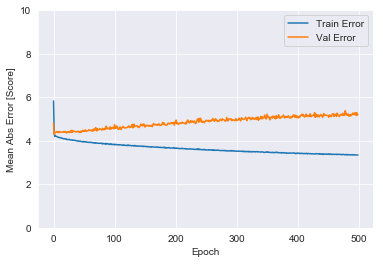

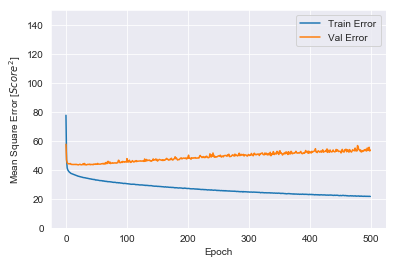

In [81]:
plot_history(history)


............................

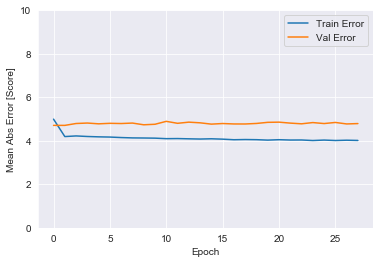

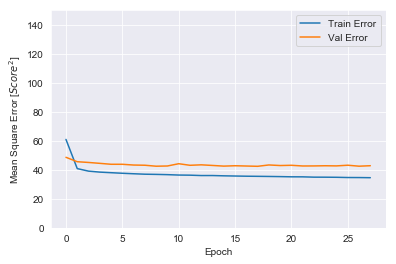

In [82]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_RB, RB_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [83]:
X_test = RBs[RB_train.columns]

In [84]:
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
RBs['DNN'] = new_predictions

In [85]:
X_train = RBtrain.drop('Score', axis=1).astype('float64')
y_train = RBtrain.Score

In [86]:
X_test = RBs[X_train.columns]

In [87]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [88]:
RBNe = neigh.predict(X_test)
RBs['NeProjections'] = RBNe

In [89]:
RBScores = pd.read_csv('Scores/RBScores.csv')
RB = pd.DataFrame({'Name': [], 'Score': []})
RB['Name'] = RBScores['Name']
RB['Score'] = RBScores['FantasyPointsDraftKings']
RB = RB.set_index('Name')
RBs = RBs.join(RB)
RBs = RBs.dropna()
RBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7300.0,18.28,26.22,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,47.2,81.9,35.6,9.7,42.4,45.3,37.0,16.430916,14.500,9.9
Chase Edmonds,3800.0,2.40,26.22,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,11.2,19.4,25.9,13.4,37.5,39.3,24.8,6.405556,3.020,0.0
TJ Logan,3000.0,0.46,26.22,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,1.2,2.1,0.0,40.0,40.0,40.0,68.0,2.678673,1.960,1.5
Derrick Coleman,3000.0,0.28,26.22,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,4.6,8.0,4.3,4.3,8.7,8.7,8.7,3.768549,0.320,0.0
Tevin Coleman,5200.0,14.40,19.74,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,39.4,58.5,28.9,8.4,35.5,37.3,35.6,13.697963,15.840,11.3
Ito Smith,3400.0,8.39,19.74,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,19.9,29.5,29.6,11.1,39.2,40.7,37.9,11.297222,8.980,2.7
Brian Hill,3000.0,0.35,19.74,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.351008,1.280,0.0
Ricky Ortiz,3000.0,0.23,19.74,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,11.0,13.1,0.0,3.4,2.3,3.4,3.1,5.912985,1.280,0.0
Gus Edwards,4400.0,8.96,28.88,29.3,58.7,387.4,6.6,19.0,12.2,44.3,...,16.0,22.8,40.0,1.2,41.2,41.2,38.2,8.856452,11.800,14.8


In [90]:
y_test = RBs.Score
y_pred = RBs.DNN
mean_squared_error(y_test, y_pred)

59.63001005996093

In [91]:
y_test = RBs.Score
y_pred = RBs.NeProjections
mean_squared_error(y_test, y_pred)

60.5207808

In [92]:
WRtrain = pd.read_csv('TrainingBig/WRtrain.csv')

In [93]:
WRtrain = WRtrain.drop('Unnamed: 0', axis=1)
WRtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,...,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.00000,5997.000000,5997.000000,5997.000000
mean,4.944779,3.002818,52.638719,38.463565,0.249005,6.700180,10.444386,0.138560,0.757682,0.631550,...,55.395214,6.199333,14.922094,85.163978,63.143505,238.546257,6.78591,10.739970,1.576601,88.187427
std,3.185686,2.095048,20.466887,28.364659,0.283403,3.240811,5.119784,0.352553,2.386516,1.903042,...,8.567631,1.300008,2.271828,111.304992,3.442838,23.834741,0.59848,0.748192,0.366258,9.291507
min,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.000000,-2.000000,0.000000,-7.000000,-7.000000,...,34.800000,3.000000,10.500000,30.687500,55.400000,169.875000,5.30000,9.200000,0.812500,66.000000
25%,2.375000,1.250000,42.583333,14.333333,0.000000,4.740000,7.333333,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.300000,34.000000,60.600000,225.000000,6.40000,10.200000,1.312500,82.000000
50%,4.666667,2.714286,56.175000,34.500000,0.181818,6.900000,10.825000,0.000000,0.000000,0.000000,...,55.300000,6.200000,14.400000,35.562500,63.200000,237.500000,6.80000,10.700000,1.555556,88.000000
75%,7.181818,4.444444,66.650000,57.000000,0.384615,8.707692,13.550000,0.125000,0.142857,0.125000,...,60.000000,7.100000,16.400000,39.062500,64.900000,251.125000,7.20000,11.200000,1.875000,94.000000
max,19.000000,16.000000,100.000000,180.000000,2.000000,26.500000,50.000000,4.000000,31.000000,34.000000,...,87.500000,10.100000,22.300000,419.000000,73.600000,313.333333,8.90000,13.600000,2.812500,121.000000


In [94]:
WR = pd.read_csv('Input/Aggregate/WRAggregate.csv')
WRavg = pd.DataFrame()
WRavg['Name'] = WR['Name']
WRavg['Rank'] = WR['Rank']
WRavg['Team'] = WR['Team']
WRavg['TargetsGame'] = WR['ReceivingTargets'] / WR['Played']
WRavg['RecGame'] = WR['Receptions'] / WR['Played']
WRavg['RecPercentage'] = WR['ReceptionPercentage']
WRavg['RecYardsGame'] = WR['ReceivingYards'] / WR['Played']
WRavg['RecTdGame'] = WR['ReceivingTouchdowns'] / WR['Played']
WRavg['YardsTarget'] = WR['ReceivingYardsPerTarget']
WRavg['RecYardsRec'] = WR['ReceivingYardsPerReception']
WRavg['RushesGame'] = WR['RushingAttempts'] / WR['Played']
WRavg['RushYardsGame'] = WR['RushingYards'] / WR['Played']
WRavg['YardAttempt'] = WR['RushingYardsPerAttempt']
WRavg['RushTdGame'] = WR['RushingTouchdowns']
WRavg['PointsGame'] = WR['FantasyPointsPerGameDraftKings']
WRavg = WRavg.set_index('Name')
WRavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Tyreek Hill,1,KC,8.545455,5.909091,69.1,100.545455,1.0,11.8,17.0,1.181818,7.363636,6.2,0,24.3
Adam Thielen,2,MIN,11.700000,8.500000,72.6,101.300000,0.7,8.7,11.9,0.200000,2.000000,10.0,0,25.5
Michael Thomas,3,NO,9.100000,8.200000,90.1,104.200000,0.8,11.5,12.7,0.000000,0.000000,0.0,0,24.1
Davante Adams,4,GB,10.600000,7.200000,67.9,95.300000,0.9,9.0,13.2,0.000000,0.000000,0.0,0,23.3
Julio Jones,5,ATL,11.100000,7.300000,65.8,115.800000,0.3,10.4,15.9,0.100000,1.100000,11.0,0,22.8


In [95]:
WRRZ = pd.read_csv('Input/RZ/WRRZ.csv')
WRRZavg = pd.DataFrame()
WRRZavg['Name'] = WRRZ['Name']
WRRZavg['RZTargetsGame'] = WRRZ['ReceivingTargets'] / WRRZ['Played']
WRRZavg['RZRecGame'] = WRRZ['Receptions'] / WRRZ['Played']
WRRZavg['RZRecPercentage'] = WRRZ['ReceptionPercentage']
WRRZavg['RZRecYardsGame'] = WRRZ['ReceivingYards'] / WRRZ['Played']
WRRZavg['RZRecTdGame'] = WRRZ['ReceivingTouchdowns'] / WRRZ['Played']
WRRZavg['RZYardsTarget'] = WRRZ['ReceivingYardsPerTarget']
WRRZavg['RZRecYardsRec'] = WRRZ['ReceivingYardsPerReception']
WRRZavg['RZRushesGame'] = WRRZ['RushingAttempts'] / WRRZ['Played']
WRRZavg['RZRushYardsGame'] = WRRZ['RushingYards'] / WRRZ['Played']
WRRZavg['RZYardAttempt'] = WRRZ['RushingYardsPerAttempt']
WRRZavg['RZRushTdGame'] = WRRZ['RushingTouchdowns'] / WRRZ['Played']
WRRZavg['RZPointsGame'] = WRRZ['FantasyPointsPerGameDraftKings']
WRRZ = WRRZavg.set_index('Name')
WRRZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Davante Adams,2.1,1.000000,47.6,10.000000,0.900000,4.8,10.0,0.0,0.0,0.0,0.0,7.4
Michael Thomas,1.9,1.600000,84.2,12.000000,0.600000,6.3,7.5,0.0,0.0,0.0,0.0,6.4
DeAndre Hopkins,1.7,1.000000,58.8,8.500000,0.600000,5.0,8.5,0.0,0.0,0.0,0.0,5.4
Tyreek Hill,1.0,0.818182,81.8,4.090909,0.454545,4.1,5.0,0.0,0.0,0.0,0.0,4.0
Adam Thielen,1.5,1.100000,73.3,5.900000,0.400000,3.9,5.4,0.0,0.0,0.0,0.0,4.2


In [96]:
WRsnaps = pd.read_csv('Input/Aggregate/WRSnaps.csv')
WRsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Robert Tonyan Jr.,GB,WR,10,13,1.3,2.0,0.0,15.4,7.7,15.4,12.4,95.4
1,2,Tim White,BAL,WR,3,2,0.7,0.8,0.0,50.0,50.0,50.0,2.4,120.0
2,3,Isaiah McKenzie,BUF,WR,2,10,5.0,6.8,30.0,10.0,40.0,40.0,5.6,56.0
3,4,Curtis Samuel,CAR,WR,7,112,16.0,22.4,3.6,20.5,18.8,24.1,68.2,60.9
4,5,Aldrick Robinson,MIN,WR,8,97,12.1,18.3,0.0,15.5,9.3,15.5,46.9,48.4


In [97]:
WRsnaps = WRsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
WRsnaps = WRsnaps.set_index('Name')

In [98]:
WRDef = pd.DataFrame()
WRDef['Team'] = Defense['Team']
WRDef['DPointsAllowed'] = Defense['DraftKingsWideReceiverFantasyPointsAllowedAverage']
WRDef = WRDef.set_index('Team')
WRDef.head()

,DPointsAllowed
Team,
BAL,31.95
MIN,31.46
JAX,31.13
BUF,30.05
DAL,31.07


In [99]:
WRSalaries = pd.read_csv('Input/Salaries/WRSalaries.csv').dropna()
WRSalaries = WRSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
WRSalaries = WRSalaries.set_index('Opponent')
WRSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
NO,Julio Jones,ATL,8300.0,24.59
ATL,Michael Thomas,NO,8900.0,22.37
DEN,Antonio Brown,PIT,8700.0,20.30
GB,Adam Thielen,MIN,7800.0,20.28
TEN,DeAndre Hopkins,HOU,7900.0,19.97


In [100]:
WRSalaries = WRSalaries.join(WRDef).join(QBDefense)
WRSalaries = WRSalaries.set_index('Team').join(Vegas).join(WROffense)
WRSalaries.head()


,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Larry Fitzgerald,5000.0,11.78,33.93,20.9,62.4,353.4,5.7,20.3,12.9,...,29.1,1.8,72.2,30.8,56.8,162.0,5.3,9.3,1.1,64
ARI,Christian Kirk,4500.0,10.97,33.93,20.9,62.4,353.4,5.7,20.3,12.9,...,29.1,1.8,72.2,30.8,56.8,162.0,5.3,9.3,1.1,64
ARI,Chad Williams,3000.0,3.59,33.93,20.9,62.4,353.4,5.7,20.3,12.9,...,29.1,1.8,72.2,30.8,56.8,162.0,5.3,9.3,1.1,64
ARI,JJ Nelson,3000.0,2.04,33.93,20.9,62.4,353.4,5.7,20.3,12.9,...,29.1,1.8,72.2,30.8,56.8,162.0,5.3,9.3,1.1,64
ARI,Trent Sherfield,3000.0,0.63,33.93,20.9,62.4,353.4,5.7,20.3,12.9,...,29.1,1.8,72.2,30.8,56.8,162.0,5.3,9.3,1.1,64


In [101]:
WRSalaries = WRSalaries.set_index('Name')
WRSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5000.0,11.78,33.93,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,29.1,1.8,72.2,30.8,56.8,162.0,5.3,9.3,1.1,64
Christian Kirk,4500.0,10.97,33.93,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,29.1,1.8,72.2,30.8,56.8,162.0,5.3,9.3,1.1,64
Chad Williams,3000.0,3.59,33.93,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,29.1,1.8,72.2,30.8,56.8,162.0,5.3,9.3,1.1,64
JJ Nelson,3000.0,2.04,33.93,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,29.1,1.8,72.2,30.8,56.8,162.0,5.3,9.3,1.1,64
Trent Sherfield,3000.0,0.63,33.93,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,29.1,1.8,72.2,30.8,56.8,162.0,5.3,9.3,1.1,64


In [102]:
WRs = WRSalaries.join(WRavg).join(WRRZ).join(WRsnaps).dropna()
WRs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5000.0,11.78,33.93,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,0.0,0.0,3.9,51.9,90.1,0.0,13.3,8.1,13.3,22.0
Christian Kirk,4500.0,10.97,33.93,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,5.0,0.0,1.2,44.6,77.4,0.4,12.1,8.5,12.6,23.5
Chad Williams,3000.0,3.59,33.93,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,0.0,0.0,0.2,43.8,60.8,0.0,8.9,3.1,8.9,8.1
JJ Nelson,3000.0,2.04,33.93,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,0.0,0.0,0.0,12.0,20.8,2.5,10.0,5.8,12.5,5.5
Trent Sherfield,3000.0,0.63,33.93,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,0.0,0.0,0.0,9.4,14.0,0.0,3.0,1.5,3.0,2.4


In [103]:
WRtrain = WRtrain.set_index('Name')

In [104]:
WR_train = WRtrain.drop('Home', axis=1)

train_dataset = WR_train.sample(frac=0.8,random_state=0)
test_dataset = WR_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
TargetsGame,4798.0,4.954000,3.198488,0.000000,2.375000,4.666667,7.166667,19.000000
RecGame,4798.0,3.009945,2.096663,0.000000,1.250000,2.750000,4.452020,14.000000
RecPercentage,4798.0,52.567308,20.420179,0.000000,42.465909,56.250000,66.650000,100.000000
RecYardsGame,4798.0,38.410663,28.287831,-2.000000,14.343750,34.366667,57.000000,180.000000
RecTdGame,4798.0,0.248805,0.284139,0.000000,0.000000,0.181818,0.384615,2.000000
YardsTarget,4798.0,6.668475,3.207716,-2.000000,4.722917,6.885714,8.700000,26.500000
RecYardsRec,4798.0,10.384337,5.080460,-2.000000,7.283929,10.789444,13.514773,50.000000
RushesGame,4798.0,0.137641,0.345162,0.000000,0.000000,0.000000,0.125000,4.000000
RushYardsGame,4798.0,0.759800,2.346324,-7.000000,0.000000,0.000000,0.166667,31.000000
YardAttempt,4798.0,0.645288,1.955649,-7.000000,0.000000,0.000000,0.142857,34.000000


In [105]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 40)                2720      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 41        
Total params: 2,761
Trainable params: 2,761
Non-trainable params: 0
_________________________________________________________________



.........................

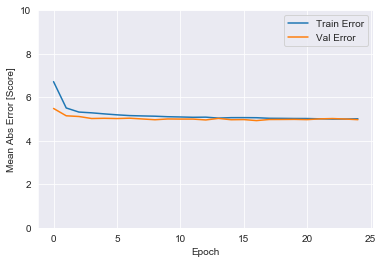

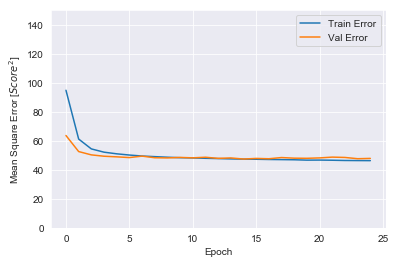

In [106]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)


In [107]:
columns = WR_train.drop('Score', axis=1)
X_test = WRs[columns.columns]
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
WRs['DNN'] = new_predictions

In [108]:
X_train = WRtrain.drop('Score', axis=1).astype('float64')
y_train = WRtrain.Score
X_test = WRs[X_train.columns]
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
WRNe = neigh.predict(X_test)
WRs['NeProjections'] = WRNe

In [109]:
WRScores = pd.read_csv('Scores/WRScores.csv')
WR = pd.DataFrame({'Name': [], 'Score': []})
WR['Name'] = WRScores['Name']
WR['Score'] = WRScores['FantasyPointsDraftKings']
WR = WR.set_index('Name')
WRs = WRs.join(WR)
WRs = WRs.dropna()
WRs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5000.0,11.78,33.93,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,51.9,90.1,0.0,13.3,8.1,13.3,22.0,9.711895,12.180,11.0
Christian Kirk,4500.0,10.97,33.93,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,44.6,77.4,0.4,12.1,8.5,12.6,23.5,7.878256,7.520,8.1
JJ Nelson,3000.0,2.04,33.93,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,12.0,20.8,2.5,10.0,5.8,12.5,5.5,3.132659,2.200,0.0
Trent Sherfield,3000.0,0.63,33.93,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,9.4,14.0,0.0,3.0,1.5,3.0,2.4,2.690662,2.020,1.6
Julio Jones,8300.0,24.59,49.22,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,54.5,80.9,0.2,20.4,13.6,20.6,41.8,20.117023,20.540,27.8
Calvin Ridley,5400.0,12.43,49.22,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,39.6,58.8,1.5,13.4,11.4,14.9,35.3,10.678402,11.020,22.3
Mohamed Sanu,4500.0,10.71,49.22,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,51.8,76.9,0.4,10.4,7.7,10.8,20.7,12.337334,13.780,11.7
Marvin Hall,3000.0,2.15,49.22,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,11.9,17.7,0.8,9.2,8.4,10.1,24.5,3.572824,6.320,0.0
Justin Hardy,3000.0,1.48,49.22,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,15.0,22.3,0.0,7.3,4.7,7.3,9.2,1.984859,2.200,1.6


In [110]:
y_test = WRs.Score
y_pred = WRs.DNN
mean_squared_error(y_test, y_pred)

42.663572934558665

In [111]:
y_test = WRs.Score
y_pred = WRs.NeProjections
mean_squared_error(y_test, y_pred)

45.28061652554744

In [112]:
TEtrain = pd.read_csv('TrainingBig/TEtrain.csv')

In [113]:
TEtrain = TEtrain.drop('Unnamed: 0', axis=1)
TEtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,...,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000
mean,3.383783,2.234286,54.289440,25.065121,0.202158,6.010370,8.307377,0.009479,0.031863,0.038579,...,55.419515,6.207556,14.909116,85.736937,63.132028,238.772524,6.791023,10.749497,1.580641,88.192721
std,2.447447,1.700388,21.582716,20.958730,0.249220,3.232473,4.479321,0.048829,0.246292,0.361031,...,8.703300,1.317804,2.280096,111.680204,3.468260,24.230400,0.606923,0.752341,0.372625,9.402187
min,0.000000,0.000000,0.000000,-0.600000,0.000000,-0.600000,-0.600000,0.000000,-0.800000,-1.000000,...,34.800000,3.000000,10.500000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,1.250000,0.833333,40.830000,8.222222,0.000000,4.000000,5.150000,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.300000,34.062500,60.500000,224.875000,6.400000,10.200000,1.312500,82.000000
50%,2.750000,1.800000,58.242857,19.600000,0.142857,5.938462,8.400000,0.000000,0.000000,0.000000,...,55.300000,6.200000,14.400000,35.562500,63.200000,237.500000,6.800000,10.700000,1.562500,88.000000
75%,5.111111,3.461538,69.800000,38.181818,0.333333,7.958333,11.000000,0.000000,0.000000,0.000000,...,60.000000,7.100000,16.600000,39.062500,64.900000,251.250000,7.200000,11.200000,1.875000,94.000000
max,14.000000,9.000000,100.000000,114.500000,3.000000,33.750000,41.000000,1.000000,5.500000,10.000000,...,87.500000,10.100000,22.300000,419.000000,73.600000,313.333333,8.900000,13.600000,2.812500,121.000000


In [114]:
TEtrain = TEtrain.set_index('Name')

In [115]:
TE_train = TEtrain.drop('Home', axis=1)

train_dataset = TE_train.sample(frac=0.8,random_state=0)
test_dataset = TE_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
TargetsGame,2308.0,3.366051,2.429394,0.000000,1.250000,2.759615,5.000000,13.500000
RecGame,2308.0,2.220407,1.686614,0.000000,0.833333,1.773504,3.400000,9.000000
RecPercentage,2308.0,54.097586,21.682163,0.000000,40.420833,58.271429,69.583333,100.000000
RecYardsGame,2308.0,24.768962,20.613668,-0.600000,8.000000,19.800000,37.425000,110.000000
RecTdGame,2308.0,0.202055,0.247830,0.000000,0.000000,0.142857,0.333333,3.000000
YardsTarget,2308.0,5.937822,3.160075,-0.600000,3.918750,5.946429,7.875694,32.000000
RecYardsRec,2308.0,8.208878,4.426764,-0.600000,5.071429,8.400000,10.955357,35.000000
RushesGame,2308.0,0.010003,0.050923,0.000000,0.000000,0.000000,0.000000,1.000000
RushYardsGame,2308.0,0.033190,0.261833,-0.800000,0.000000,0.000000,0.000000,5.500000
YardAttempt,2308.0,0.040815,0.392407,-1.000000,0.000000,0.000000,0.000000,10.000000


In [116]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 40)                2720      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 41        
Total params: 2,761
Trainable params: 2,761
Non-trainable params: 0
_________________________________________________________________



........................

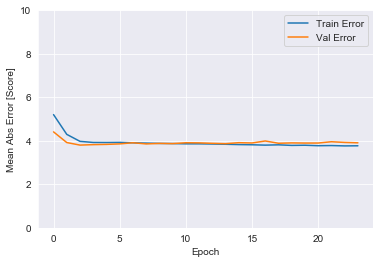

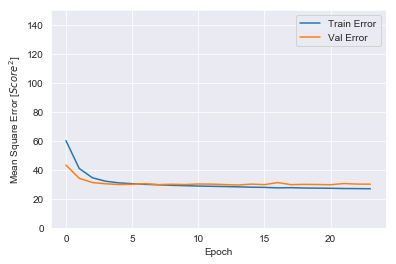

In [117]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [118]:
TE = pd.read_csv('Input/Aggregate/TEAggregate.csv')
TEavg = pd.DataFrame()
TEavg['Name'] = TE['Name']
TEavg['Rank'] = TE['Rank']
TEavg['Team'] = TE['Team']
TEavg['TargetsGame'] = TE['ReceivingTargets'] / TE['Played']
TEavg['RecGame'] = TE['Receptions'] / TE['Played']
TEavg['RecPercentage'] = TE['ReceptionPercentage']
TEavg['RecYardsGame'] = TE['ReceivingYards'] / TE['Played']
TEavg['RecTdGame'] = TE['ReceivingTouchdowns'] / TE['Played']
TEavg['YardsTarget'] = TE['ReceivingYardsPerTarget']
TEavg['RecYardsRec'] = TE['ReceivingYardsPerReception']
TEavg['RushesGame'] = TE['RushingAttempts'] / TE['Played']
TEavg['RushYardsGame'] = TE['RushingYards'] / TE['Played']
TEavg['YardAttempt'] = TE['RushingYardsPerAttempt']
TEavg['RushTdGame'] = TE['RushingTouchdowns']
TEavg['PointsGame'] = TE['FantasyPointsPerGameDraftKings']
TEavg = TEavg.set_index('Name')
TEavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Travis Kelce,1,KC,9.181818,6.090909,66.3,83.090909,0.636364,9.0,13.6,0.0,0.0,0.0,0,19.3
Zach Ertz,2,PHI,10.300000,7.700000,74.8,80.400000,0.500000,7.8,10.4,0.0,0.0,0.0,0,19.9
George Kittle,3,SF,7.100000,5.000000,70.4,77.500000,0.300000,10.9,15.5,0.0,0.0,0.0,0,15.4
Eric Ebron,4,IND,6.500000,3.900000,60.0,46.300000,0.900000,7.1,11.9,0.2,0.1,0.5,1,14.8
Jared Cook,5,OAK,6.500000,4.500000,69.2,57.700000,0.400000,8.9,12.8,0.0,0.0,0.0,0,13.3


In [119]:
TERZ = pd.read_csv('Input/RZ/TERZ.csv')
TERZavg = pd.DataFrame()
TERZavg['Name'] = TERZ['Name']
TERZavg['RZTargetsGame'] = TERZ['ReceivingTargets'] / TERZ['Played']
TERZavg['RZRecGame'] = TERZ['Receptions'] / TERZ['Played']
TERZavg['RZRecPercentage'] = TERZ['ReceptionPercentage']
TERZavg['RZRecYardsGame'] = TERZ['ReceivingYards'] / TERZ['Played']
TERZavg['RZRecTdGame'] = TERZ['ReceivingTouchdowns'] / TERZ['Played']
TERZavg['RZYardsTarget'] = TERZ['ReceivingYardsPerTarget']
TERZavg['RZRecYardsRec'] = TERZ['ReceivingYardsPerReception']
TERZavg['RZRushesGame'] = TERZ['RushingAttempts'] / TERZ['Played']
TERZavg['RZRushYardsGame'] = TERZ['RushingYards'] / TERZ['Played']
TERZavg['RZYardAttempt'] = TERZ['RushingYardsPerAttempt']
TERZavg['RZRushTdGame'] = TERZ['RushingTouchdowns'] / TERZ['Played']
TERZavg['RZPointsGame'] = TERZ['FantasyPointsPerGameDraftKings']
TERZ = TERZavg.set_index('Name')
TERZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Eric Ebron,1.600000,0.800000,50.0,8.600000,0.700000,5.4,10.8,0.2,0.1,0.5,0.1,6.5
Travis Kelce,1.545455,0.909091,58.8,7.545455,0.545455,4.9,8.3,0.0,0.0,0.0,0.0,4.9
Zach Ertz,1.700000,1.000000,58.8,6.600000,0.500000,3.9,6.6,0.0,0.0,0.0,0.0,4.7
Trey Burton,0.900000,0.800000,88.9,4.200000,0.400000,4.7,5.2,0.1,0.2,2.0,0.0,3.8
OJ Howard,0.800000,0.500000,62.5,5.000000,0.400000,6.2,10.0,0.0,0.0,0.0,0.0,3.4


In [120]:
TEsnaps = pd.read_csv('Input/Aggregate/TESnaps.csv')
TEsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Jordan Franks,CIN,TE,2,4,2.0,3.3,0.0,50.0,50.0,50.0,5.7,142.5
1,2,Erik Swoope,IND,TE,5,55,11.0,9.9,0.0,14.5,12.7,14.5,33.3,60.5
2,3,Matt Lengel,CIN,TE,3,22,7.3,12.3,0.0,13.6,9.1,13.6,8.8,40.0
3,4,Seth DeValve,CLE,TE,7,39,5.6,7.8,0.0,10.3,7.7,10.3,14.4,36.9
4,5,Eric Ebron,IND,TE,10,385,38.5,54.6,0.5,16.9,10.9,17.7,148.4,38.5


In [121]:
TEsnaps = TEsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
TEsnaps = TEsnaps.set_index('Name')

In [122]:
TEDef = pd.DataFrame()
TEDef['Team'] = Defense['Team']
TEDef['DPointsAllowed'] = Defense['DraftKingsTightEndFantasyPointsAllowedAverage']
TEDef = TEDef.set_index('Team')
TEDef.head()

,DPointsAllowed
Team,
BAL,12.93
MIN,11.96
JAX,14.08
BUF,10.21
DAL,14.14


In [123]:
TESalaries = pd.read_csv('Input/Salaries/TESalaries.csv').dropna()
TESalaries = TESalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
TESalaries = TESalaries.set_index('Opponent')
TESalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
NYG,Zach Ertz,PHI,6400.0,16.77
TB,George Kittle,SF,6200.0,14.32
NYJ,Rob Gronkowski,NE,5100.0,12.66
SEA,Greg Olsen,CAR,4400.0,11.15
MIA,Jack Doyle,IND,4100.0,11.09


In [124]:
TESalaries = TESalaries.join(TEDef).join(QBDefense)
TESalaries = TESalaries.set_index('Team').join(Vegas).join(WROffense)
TESalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Ricky Seals-Jones,3100.0,6.32,11.95,20.9,62.4,353.4,5.7,20.3,12.9,...,29.1,1.8,72.2,30.8,56.8,162.0,5.3,9.3,1.1,64
ARI,Jermaine Gresham,2500.0,3.02,11.95,20.9,62.4,353.4,5.7,20.3,12.9,...,29.1,1.8,72.2,30.8,56.8,162.0,5.3,9.3,1.1,64
ARI,John Phillips,2500.0,0.22,11.95,20.9,62.4,353.4,5.7,20.3,12.9,...,29.1,1.8,72.2,30.8,56.8,162.0,5.3,9.3,1.1,64
ATL,Austin Hooper,4200.0,10.48,8.27,23.9,58.2,358.2,6.2,20.7,10.5,...,51.1,3.0,66.7,39.4,71.1,314.6,8.0,11.2,2.2,109
ATL,Eric Saubert,2500.0,1.10,8.27,23.9,58.2,358.2,6.2,20.7,10.5,...,51.1,3.0,66.7,39.4,71.1,314.6,8.0,11.2,2.2,109


In [125]:
TESalaries = TESalaries.set_index('Name')
TESalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,3100.0,6.32,11.95,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,29.1,1.8,72.2,30.8,56.8,162.0,5.3,9.3,1.1,64
Jermaine Gresham,2500.0,3.02,11.95,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,29.1,1.8,72.2,30.8,56.8,162.0,5.3,9.3,1.1,64
John Phillips,2500.0,0.22,11.95,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,29.1,1.8,72.2,30.8,56.8,162.0,5.3,9.3,1.1,64
Austin Hooper,4200.0,10.48,8.27,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,51.1,3.0,66.7,39.4,71.1,314.6,8.0,11.2,2.2,109
Eric Saubert,2500.0,1.10,8.27,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,51.1,3.0,66.7,39.4,71.1,314.6,8.0,11.2,2.2,109


In [126]:
TEs = TESalaries.join(TEavg).join(TERZ).join(TEsnaps).dropna()
TEs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,3100.0,6.32,11.95,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,0.0,0.0,0.0,39.1,67.9,0.0,13.0,6.4,13.0,14.9
Jermaine Gresham,2500.0,3.02,11.95,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,0.0,0.0,0.3,30.8,51.5,0.0,3.7,2.8,3.7,5.5
John Phillips,2500.0,0.22,11.95,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,0.0,0.0,0.0,13.5,21.3,0.0,0.0,0.0,0.0,0.0
Austin Hooper,4200.0,10.48,8.27,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,0.0,0.0,3.3,55.4,82.2,0.0,11.4,9.0,11.4,20.7
Eric Saubert,2500.0,1.10,8.27,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,0.0,0.0,0.0,7.1,10.5,0.0,8.5,4.2,8.5,8.9


In [127]:
columns = TE_train.drop('Score', axis=1)
X_test = TEs[columns.columns]
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
TEs['DNN'] = new_predictions

In [128]:
X_train = TEtrain.drop('Score', axis=1).astype('float64')
y_train = TEtrain.Score
X_test = TEs[X_train.columns]
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
TENe = neigh.predict(X_test)
TEs['NeProjections'] = TENe

In [129]:
TEScores = pd.read_csv('Scores/TEScores.csv')
TE = pd.DataFrame({'Name': [], 'Score': []})
TE['Name'] = TEScores['Name']
TE['Score'] = TEScores['FantasyPointsDraftKings']
TE = TE.set_index('Name')
TEs = TEs.join(TE)
TEs = TEs.dropna()
TEs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,3100.0,6.32,11.95,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,39.1,67.9,0.0,13.0,6.4,13.0,14.9,5.356749,3.82,1.5
Jermaine Gresham,2500.0,3.02,11.95,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,30.8,51.5,0.0,3.7,2.8,3.7,5.5,2.204305,3.58,1.2
John Phillips,2500.0,0.22,11.95,20.9,62.4,353.4,5.7,20.3,12.9,41.1,...,13.5,21.3,0.0,0.0,0.0,0.0,0.0,1.530440,3.26,0.0
Austin Hooper,4200.0,10.48,8.27,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,55.4,82.2,0.0,11.4,9.0,11.4,20.7,13.162859,12.48,8.1
Eric Saubert,2500.0,1.10,8.27,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,7.1,10.5,0.0,8.5,4.2,8.5,8.9,3.441080,0.00,0.0
Logan Paulsen,2500.0,0.73,8.27,23.9,58.2,358.2,6.2,20.7,10.5,39.0,...,25.5,37.8,0.0,2.7,2.7,2.7,7.8,1.691870,3.02,1.2
Mark Andrews,2600.0,5.45,13.61,29.3,58.7,387.4,6.6,19.0,12.2,44.3,...,26.3,35.0,0.0,12.5,8.4,12.5,22.9,2.273912,5.34,8.4
Nick Boyle,2600.0,3.10,13.61,29.3,58.7,387.4,6.6,19.0,12.2,44.3,...,41.4,55.1,0.0,7.5,4.3,7.5,8.5,3.350123,5.04,3.9
Hayden Hurst,2500.0,2.83,13.61,29.3,58.7,387.4,6.6,19.0,12.2,44.3,...,24.8,34.0,0.7,6.7,3.4,7.4,10.5,2.699298,8.70,5.5


In [130]:
y_test = TEs.Score
y_pred = TEs.DNN
mean_squared_error(y_test, y_pred)

25.179808443899333

In [131]:
y_test = TEs.Score
y_pred = TEs.NeProjections
mean_squared_error(y_test, y_pred)

19.529636363636367